In [1]:
%load_ext autoreload
%autoreload 2

import sys
import time
from pprint import pformat

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as patches
# import seaborn as sns
%matplotlib inline

from geodesic_agent import GeodesicAgent
from gridworld import Arena, Bottleneck, LinearChamber
from graph import CommunityGraph
from plot_utils import plot_replay, plot_traj, plot_need_gain
from RL_utils import oned_twod

def dict_print(d, indent_size=1):
    '''
        Fancy printing. Collapse identical, consecutive rows in input dictionary d.
    '''
    indent = ' ' * indent_size
    for kdx, key in enumerate(d.keys()):
        val = d[key]
        if kdx == 0: # No previous one to compare to
            prev_val = val
            start = kdx
            continue
        
        if val == prev_val: # Consecutive, skip
            continue
        
        # Non-consecutive, print out
        if kdx - 1 == start:
            print_key = '%d' % start
        else:
            print_key = '%d-%d' % (start, kdx - 1)
        
        print(indent + '%s: %s' % (print_key, prev_val))
        
        # Update
        start = kdx
        prev_val = val
    
    if kdx - 1 == start:
        print_key = '%d' % start
    else:
        print_key = '%d-%d' % (start, kdx - 1)

    print(indent + '%s: %s' % (print_key, prev_val))


mpl.rcParams.update({'font.size': 15})
mpl.rcParams.update({'font.family': 'Arial'})

FONT_BG = 25
mpl.rcParams['pdf.fonttype'] = 42 # allow text of pdf to be edited in illustrator

mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False

In [2]:
# Physics
width = 10
height = 7
num_states = width * height

# Build object
one_start_state = np.zeros(num_states)
one_start_state[0] = 1
all_start_states = np.ones(num_states) / num_states
init_state_dist = one_start_state

arena = Arena(width, height, init_state_distribution=init_state_dist)
all_experiences = arena.get_all_transitions()
T = arena.transitions

## Agent parameters
corner_goals = np.array([width - 1, (height - 1) * width, height * width - 1]) # Non-start corners
all_goals = np.arange(0, width * height)
goals = all_goals

alpha = 1.0
gamma = 0.95
num_replay_steps = 10000

# Set up agent
ga = GeodesicAgent(arena.num_states, arena.num_actions, goals, T, alpha=alpha, gamma=gamma,
                   s0_dist=init_state_dist)
ga.curr_state = 0
ga.remember(all_experiences) # Pre-load our agent with all possible memories

G = arena.solve_GR(10000, gamma)
## Run replay
# replayed_experiences, stats_for_nerds, backups = ga.replay(num_steps=num_replay_steps, verbose=True, prospective=True)
# needs, trans_needs, gains, all_MEVBs = stats_for_nerds
# ga.uniform_replay(num_replay_steps)

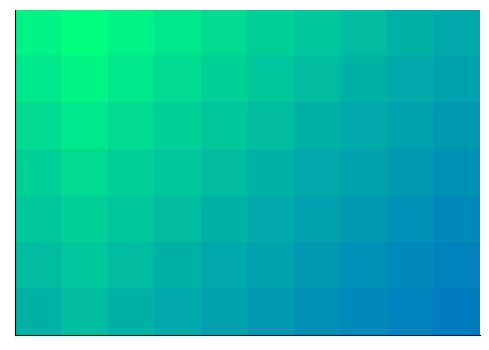

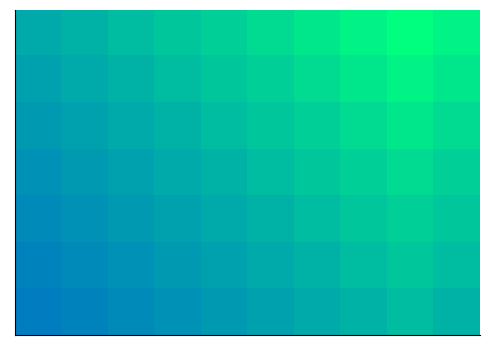

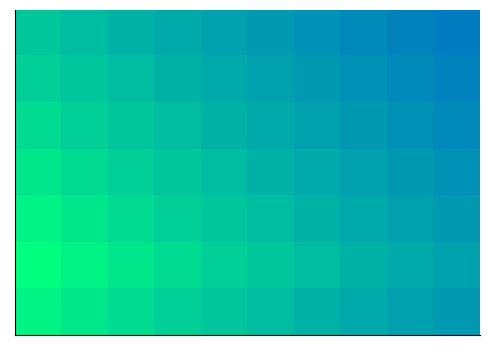

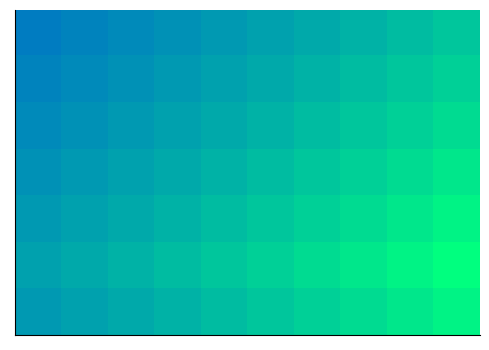

In [9]:
# plt.tick_params(bottom=False, left=False)
plt.figure(figsize=(6, 12))
plt.imshow(G[0, 2, :].reshape((height, width)), vmin=0, vmax=1, cmap='winter')
plt.xticks([])
plt.yticks([])
# plt.colorbar()
plt.savefig('./figs/fig1/fig1GR_tl.pdf', transparent=True)

plt.figure(figsize=(6, 12))
plt.imshow(G[corner_goals[0], 0, :].reshape((height, width)), vmin=0, vmax=1, cmap='winter')
# plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.savefig('./figs/fig1/fig1GR_tr.pdf', transparent=True)

plt.figure(figsize=(6, 12))
plt.imshow(G[corner_goals[1], 1, :].reshape((height, width)), vmin=0, vmax=1, cmap='winter')
# plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.savefig('./figs/fig1/fig1GR_bl.pdf', transparent=True)

plt.figure(figsize=(6, 12))
plt.imshow(G[corner_goals[2], 1, :].reshape((height, width)), vmin=0, vmax=1, cmap='winter')
# plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.savefig('./figs/fig1/fig1GR_br.pdf', transparent=True)
# plt.tick_params(bottom=True, left=True)

*Open field (Fig 2)*

In [2]:
# Physics
width = 10
height = 7
num_states = width * height

# Build object
one_start_state = np.zeros(num_states)
one_start_state[0] = 1
all_start_states = np.ones(num_states) / num_states
init_state_dist = all_start_states

arena = Arena(width, height, init_state_distribution=init_state_dist)
all_experiences = arena.get_all_transitions()
T = arena.transitions

## Agent parameters
corner_goals = np.array([width - 1, (height - 1) * width, height * width - 1]) # Non-start corners
all_goals = np.arange(0, width * height)
goals = all_goals

alpha = 1.0
gamma = 0.95
num_replay_steps = 20

# Set up agent
ga = GeodesicAgent(arena.num_states, arena.num_actions, goals, T, alpha=alpha, gamma=gamma,
                   s0_dist=init_state_dist)
ga.curr_state = 0
ga.remember(all_experiences) # Pre-load our agent with all possible memories

## Run replay
replayed_experiences, stats_for_nerds, backups = ga.replay(num_steps=num_replay_steps, verbose=True, prospective=True)
needs, trans_needs, gains, all_MEVBs = stats_for_nerds

First 20 replay steps


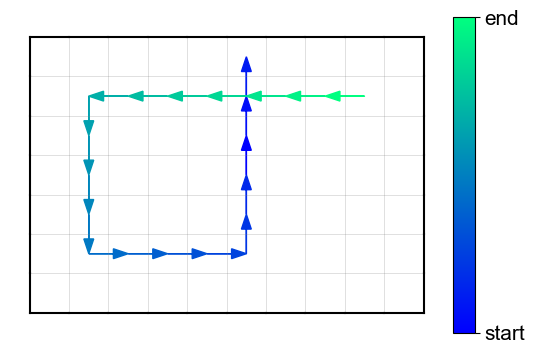

In [4]:
# Plot the replayed experiences
print('First %d replay steps' % num_replay_steps, flush=True)
fig, ax = plt.subplots(1, 1, figsize=(6,6))
plot_replay(arena, np.array(replayed_experiences).astype(int), ax=ax)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.axis('off')
# ax.scatter(0.5, 0.5, marker='x', color='r')
# plt.show()
plt.savefig('./figs/fig2/fig2_openfield_allgoals.pdf', transparent=True)

*Open field (fig 1)*

In [2]:
# Physics
width = 10
height = 7
num_states = width * height

# Build object
one_start_state = np.zeros(num_states)
one_start_state[0] = 1
all_start_states = np.ones(num_states) / num_states
init_state_dist = one_start_state

arena = Arena(width, height, init_state_distribution=init_state_dist)
all_experiences = arena.get_all_transitions()
T = arena.transitions

## Agent parameters
corner_goals = np.array([width - 1, (height - 1) * width, height * width - 1]) # Non-start corners
all_goals = np.arange(0, width * height)
goals = corner_goals

alpha = 1.0
gamma = 0.95
num_replay_steps = 1

# Set up agent
ga = GeodesicAgent(arena.num_states, arena.num_actions, goals, T, alpha=alpha, gamma=gamma,
                   s0_dist=init_state_dist)
ga.curr_state = 0
ga.remember(all_experiences) # Pre-load our agent with all possible memories

## Run replay
replayed_experiences, stats_for_nerds, backups = ga.replay(num_steps=num_replay_steps, verbose=True, prospective=True)
needs, trans_needs, gains, all_MEVBs = stats_for_nerds

First 1 replay steps


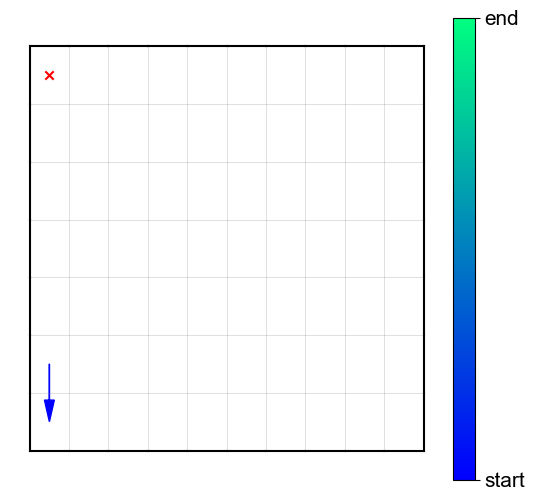

step 0:
	Replayed transition: [50  3 60]
	Backup dictionary:
        0-1: []
	Replay history:


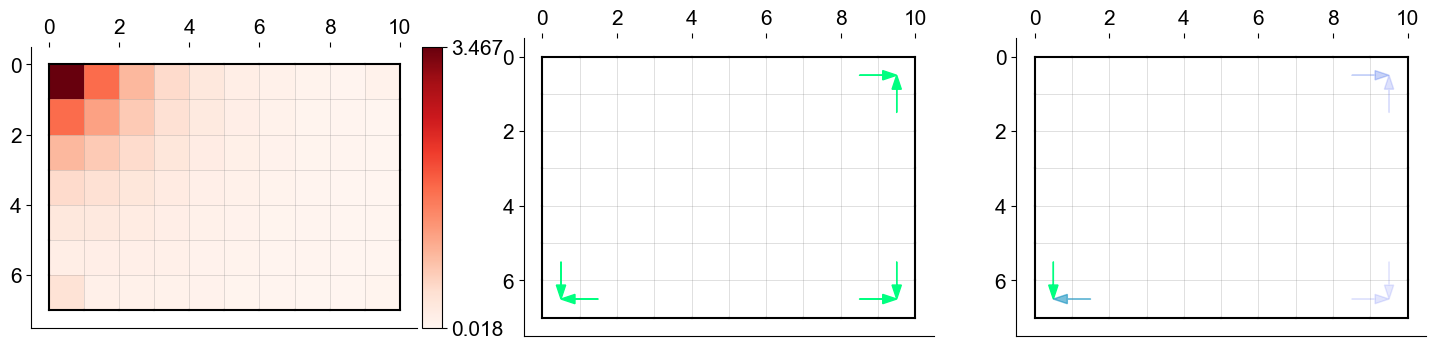

In [32]:
# Plot the replayed experiences
print('First %d replay steps' % num_replay_steps, flush=True)
fig, ax = plt.subplots(1, 1, figsize=(6,6))
plot_replay(arena, np.array(replayed_experiences).astype(int), ax=ax)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.axis('off')
ax.scatter(0.5, 0.5, marker='x', color='r')
plt.show()

# Plotting params
# params = {'min_need' : 0,
#           'max_need' : 1,
#           'alpha_fac' : 0.5}
params = None

# Plot need, gain, MEVB throughout each of those steps
meta_need = np.mean(needs, axis=1)
meta_gain = np.mean(gains, axis=1)
meta_MEVB = np.mean(all_MEVBs, axis=1)
verbose = True

for i in range(num_replay_steps):
    print('step %d:' % i)
    if verbose:
        print('\tReplayed transition:', replayed_experiences[i])
        print('\tBackup dictionary:')
        dict_print(backups[i], indent_size=8)
        print('\tReplay history:')
        for j in range(i):
            print('\t\t',replayed_experiences[j])

#     plot_need_gain(arena, ga.memory, np.average(meta_need[i, :, :], weights=init_state_dist, axis=0), 
#                    meta_gain[i, :], meta_MEVB[i, :], specials=[tuple(replayed_experiences[i])], params=params)
    plot_need_gain(arena, ga.memory, np.average(meta_need[i, :, :], weights=init_state_dist, axis=0), 
                   meta_gain[i, :], meta_MEVB[i, :], specials=None, params=params)
    plt.savefig('./figs/fig1needgainevb_pre.pdf', transparent=True)
    plt.show()

In [6]:
# Physics
width = 10
height = 7
num_states = width * height

# Build object
one_start_state = np.zeros(num_states)
one_start_state[0] = 1
all_start_states = np.ones(num_states) / num_states
init_state_dist = one_start_state

arena = Arena(width, height, init_state_distribution=init_state_dist)
all_experiences = arena.get_all_transitions()
T = arena.transitions

## Agent parameters
corner_goals = np.array([width - 1, (height - 1) * width, height * width - 1]) # Non-start corners
all_goals = np.arange(0, width * height)
goals = corner_goals

alpha = 1.0
gamma = 0.95
num_replay_steps = 1

# Set up agent
ga = GeodesicAgent(arena.num_states, arena.num_actions, goals, T, alpha=alpha, gamma=gamma,
                   s0_dist=init_state_dist)
ga.curr_state = 0
ga.remember(all_experiences) # Pre-load our agent with all possible memories
G = arena.solve_GR(10000, gamma)
ga.initialize_GR(G)

## Run replay
replayed_experiences, stats_for_nerds, backups = ga.replay(num_steps=num_replay_steps, verbose=True, 
                                                           prospective=True, check_convergence=False)
needs, trans_needs, gains, all_MEVBs = stats_for_nerds

In [4]:
def zero_needs(needs, goals):
    zeroed_needs = needs.copy()
    num_replay_steps, num_goals, num_src, num_dst = needs.shape
    for replay_step in range(num_replay_steps): # For every step of replay...
        for gdx in range(num_goals): # For every goal...
            # zero out the need of that specific goal for each state
            goal = goals[gdx]
            zeroed_needs[replay_step, gdx, :, goal] = 0
    
    return zeroed_needs

First 1 replay steps


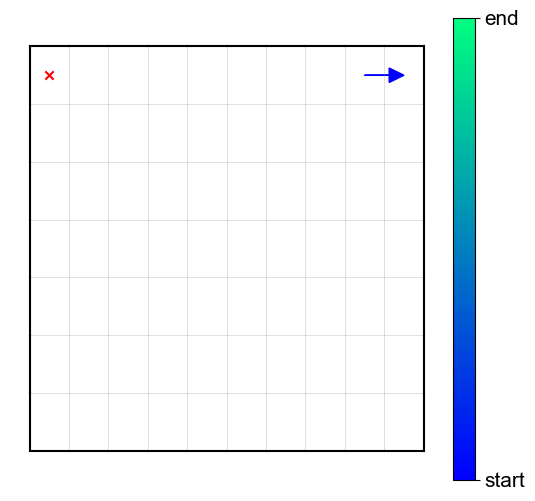

step 0:
	Replayed transition: [8 2 9]
	Backup dictionary:
        0-1: []
	Replay history:


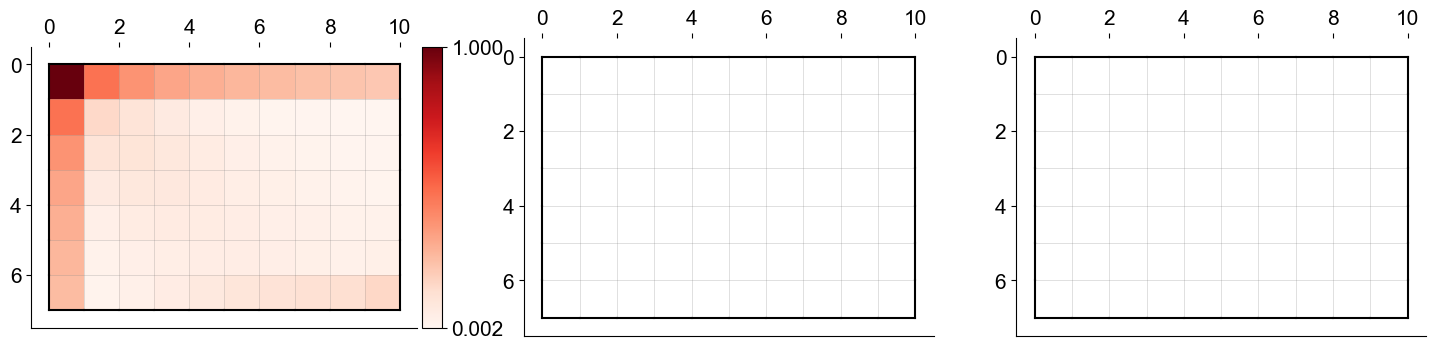

In [7]:
# Plot the replayed experiences
print('First %d replay steps' % num_replay_steps, flush=True)
fig, ax = plt.subplots(1, 1, figsize=(6,6))
plot_replay(arena, np.array(replayed_experiences).astype(int), ax=ax)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.axis('off')
ax.scatter(0.5, 0.5, marker='x', color='r')
plt.show()

# Plotting params
# params = {'min_need' : 0,
#           'max_need' : 1,
#           'alpha_fac' : 0.5}
params = None

# Plot need, gain, MEVB throughout each of those steps
# zeroed_needs = zero_needs(needs, goals)
zeroed_needs = needs
meta_need = np.mean(zeroed_needs, axis=1)
meta_gain = np.mean(gains, axis=1)
meta_MEVB = np.mean(all_MEVBs, axis=1)
verbose = True

for i in range(num_replay_steps):
    print('step %d:' % i)
    if verbose:
        print('\tReplayed transition:', replayed_experiences[i])
        print('\tBackup dictionary:')
        dict_print(backups[i], indent_size=8)
        print('\tReplay history:')
        for j in range(i):
            print('\t\t',replayed_experiences[j])

#     plot_need_gain(arena, ga.memory, np.average(meta_need[i, :, :], weights=init_state_dist, axis=0), 
#                    meta_gain[i, :], meta_MEVB[i, :], specials=[tuple(replayed_experiences[i])], params=params)
    plot_need_gain(arena, ga.memory, np.average(meta_need[i, :, :], weights=init_state_dist, axis=0), 
                   meta_gain[i, :], meta_MEVB[i, :], specials=None, params=params)
    plt.savefig('./figs/fig1needgainevb_post.pdf', transparent=True)
    plt.show()

*Bottleneck chamber*

In [13]:
## Bottleneck
# Physics
room_width = 6
corridor_width = 5
width = room_width * 2 + corridor_width
height = 7
num_states = width * height

# Build object
valid_states = Bottleneck.get_valid_states(room_width, corridor_width, height)

all_states = np.ones(num_states) / len(valid_states)
one_state = np.zeros(num_states)
one_state[0] = 1
init_state_dist = all_states

bottleneck = Bottleneck(room_width, corridor_width, height, init_state_distribution=init_state_dist)
all_experiences = bottleneck.get_all_transitions()
T = bottleneck.transitions

## Agent parameters
corner_goals = np.array([width - 1, height * width - 1]) # Non-start corners
all_goals = np.arange(num_states)
goals = all_goals

alpha = 1.0
gamma = 0.95
num_replay_steps = 20

# Set up agent
ga = GeodesicAgent(bottleneck.num_states, bottleneck.num_actions, goals, T, alpha=alpha, gamma=gamma,
                  s0_dist=init_state_dist)
ga.curr_state = 0
ga.remember(all_experiences) # Pre-load our agent with all possible memories

## Run replay
replayed_exps, stats_for_nerds, backups = ga.replay(num_steps=num_replay_steps, verbose=True, prospective=True)
needs, trans_needs, gains, all_MEVBs = stats_for_nerds

First 20 replay steps
step 0:
	Replayed transition: [56  2 57]
	Backup dictionary:
        0-117: []
	Replay history:


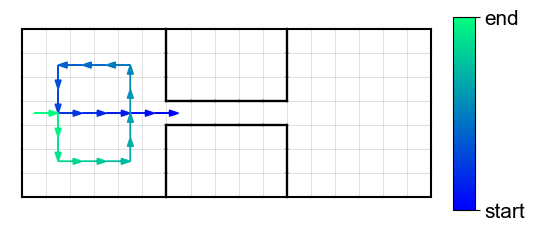

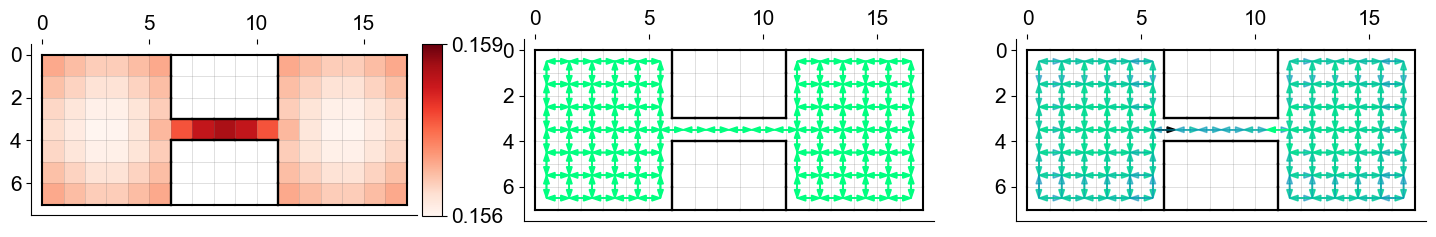

step 1:
	Replayed transition: [55  2 56]
	Backup dictionary:
        0-117: []
	Replay history:
		 [56  2 57]


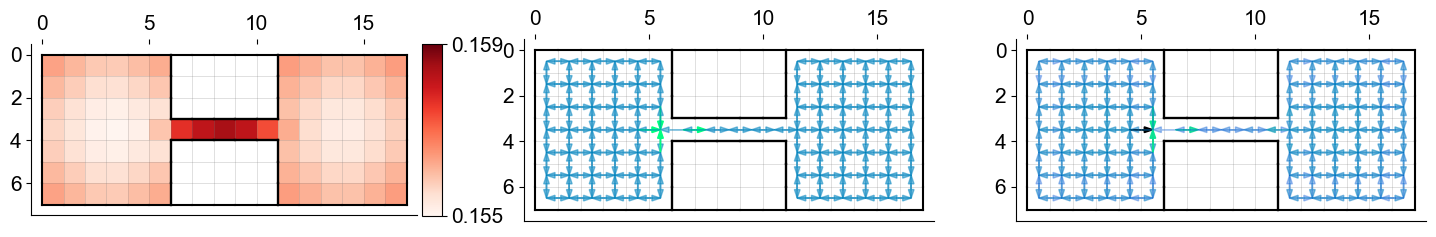

step 2:
	Replayed transition: [54  2 55]
	Backup dictionary:
        0-117: []
	Replay history:
		 [56  2 57]
		 [55  2 56]


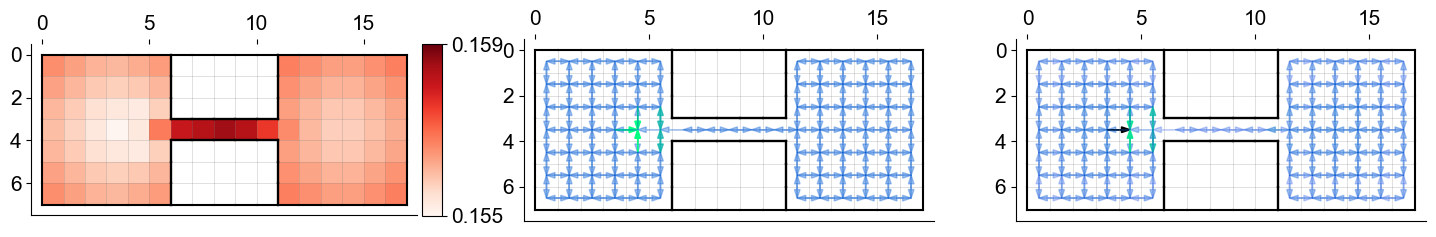

step 3:
	Replayed transition: [53  2 54]
	Backup dictionary:
        0-117: []
	Replay history:
		 [56  2 57]
		 [55  2 56]
		 [54  2 55]


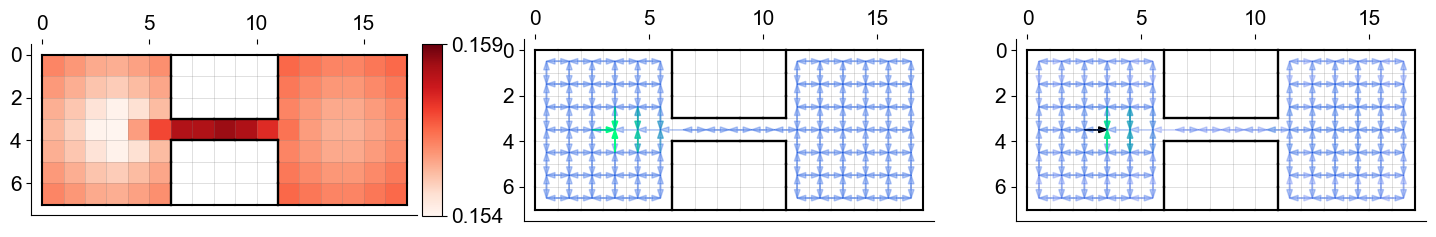

step 4:
	Replayed transition: [52  2 53]
	Backup dictionary:
        0-117: []
	Replay history:
		 [56  2 57]
		 [55  2 56]
		 [54  2 55]
		 [53  2 54]


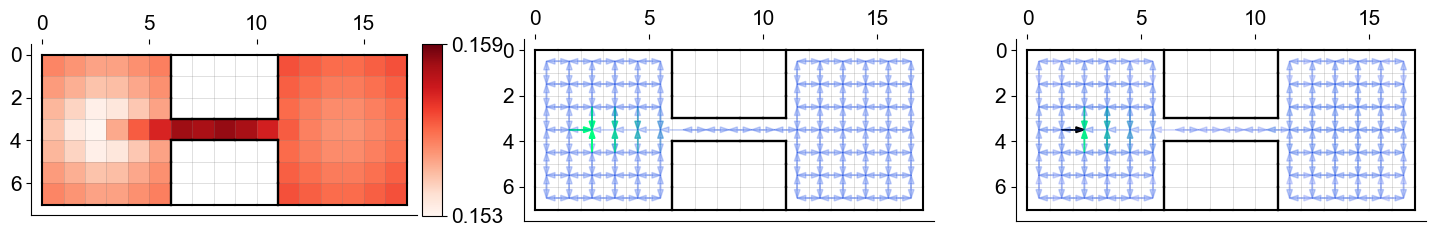

step 5:
	Replayed transition: [35  3 52]
	Backup dictionary:
        0-117: []
	Replay history:
		 [56  2 57]
		 [55  2 56]
		 [54  2 55]
		 [53  2 54]
		 [52  2 53]


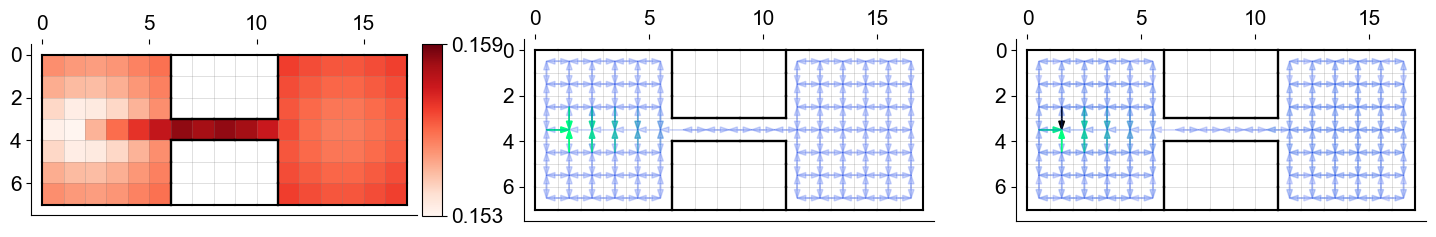

step 6:
	Replayed transition: [18  3 35]
	Backup dictionary:
        0-117: []
	Replay history:
		 [56  2 57]
		 [55  2 56]
		 [54  2 55]
		 [53  2 54]
		 [52  2 53]
		 [35  3 52]


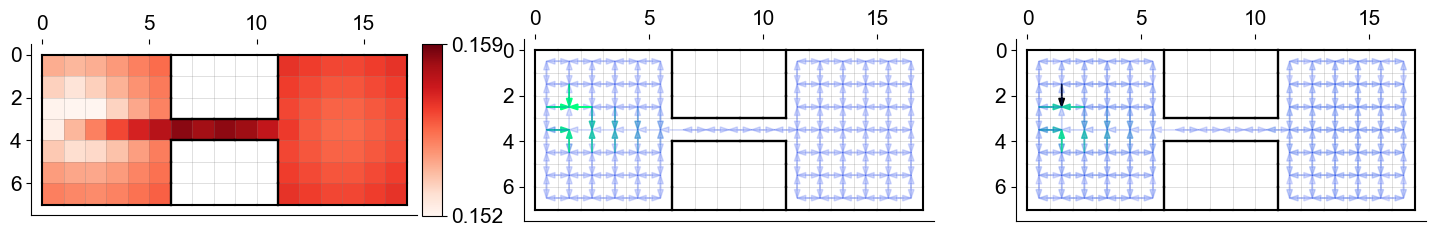

step 7:
	Replayed transition: [19  0 18]
	Backup dictionary:
        0-117: []
	Replay history:
		 [56  2 57]
		 [55  2 56]
		 [54  2 55]
		 [53  2 54]
		 [52  2 53]
		 [35  3 52]
		 [18  3 35]


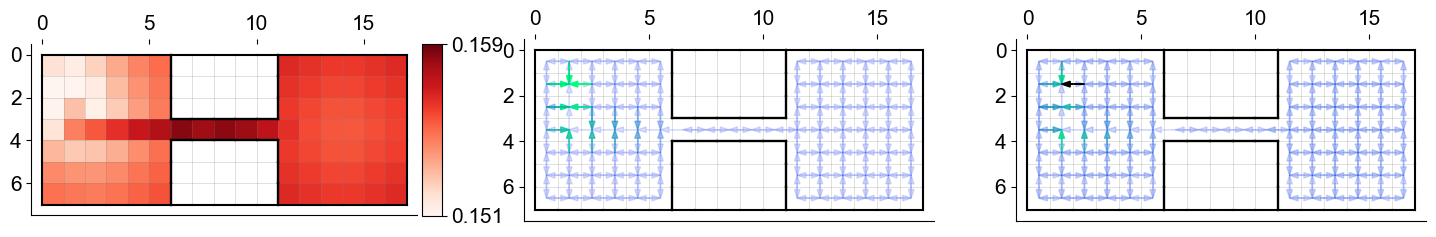

step 8:
	Replayed transition: [20  0 19]
	Backup dictionary:
        0-117: []
	Replay history:
		 [56  2 57]
		 [55  2 56]
		 [54  2 55]
		 [53  2 54]
		 [52  2 53]
		 [35  3 52]
		 [18  3 35]
		 [19  0 18]


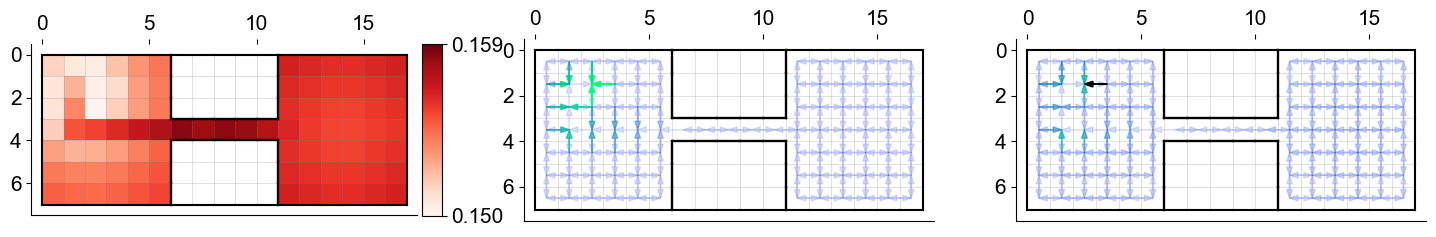

step 9:
	Replayed transition: [21  0 20]
	Backup dictionary:
        0-117: []
	Replay history:
		 [56  2 57]
		 [55  2 56]
		 [54  2 55]
		 [53  2 54]
		 [52  2 53]
		 [35  3 52]
		 [18  3 35]
		 [19  0 18]
		 [20  0 19]


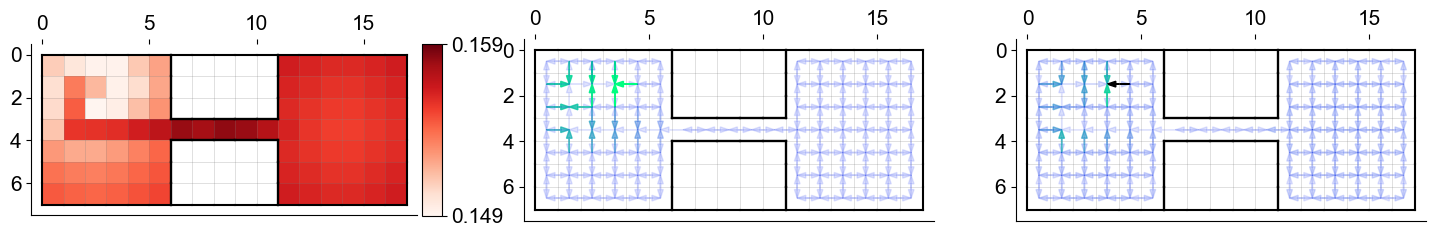

step 10:
	Replayed transition: [38  1 21]
	Backup dictionary:
        0-117: []
	Replay history:
		 [56  2 57]
		 [55  2 56]
		 [54  2 55]
		 [53  2 54]
		 [52  2 53]
		 [35  3 52]
		 [18  3 35]
		 [19  0 18]
		 [20  0 19]
		 [21  0 20]


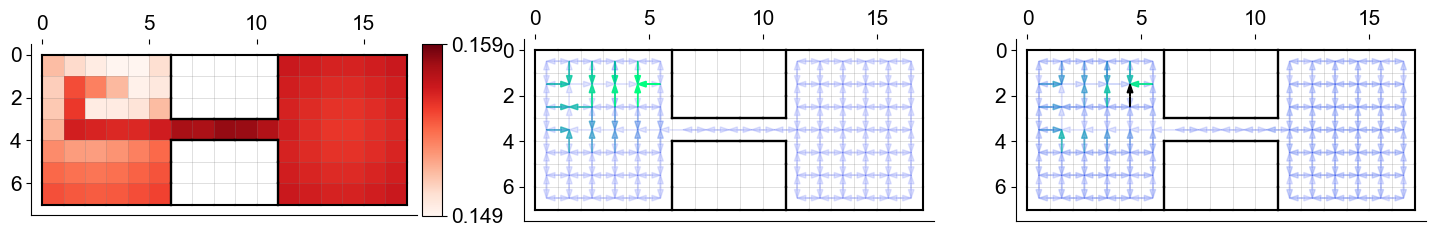

step 11:
	Replayed transition: [55  1 38]
	Backup dictionary:
        0-117: []
	Replay history:
		 [56  2 57]
		 [55  2 56]
		 [54  2 55]
		 [53  2 54]
		 [52  2 53]
		 [35  3 52]
		 [18  3 35]
		 [19  0 18]
		 [20  0 19]
		 [21  0 20]
		 [38  1 21]


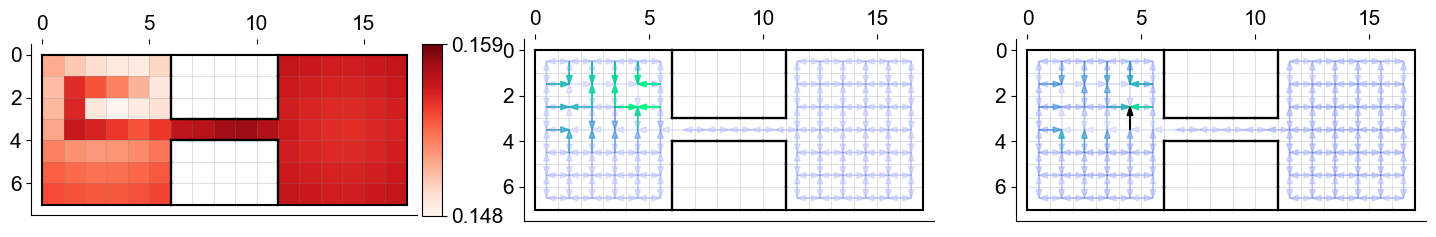

step 12:
	Replayed transition: [72  1 55]
	Backup dictionary:
        0-117: []
	Replay history:
		 [56  2 57]
		 [55  2 56]
		 [54  2 55]
		 [53  2 54]
		 [52  2 53]
		 [35  3 52]
		 [18  3 35]
		 [19  0 18]
		 [20  0 19]
		 [21  0 20]
		 [38  1 21]
		 [55  1 38]


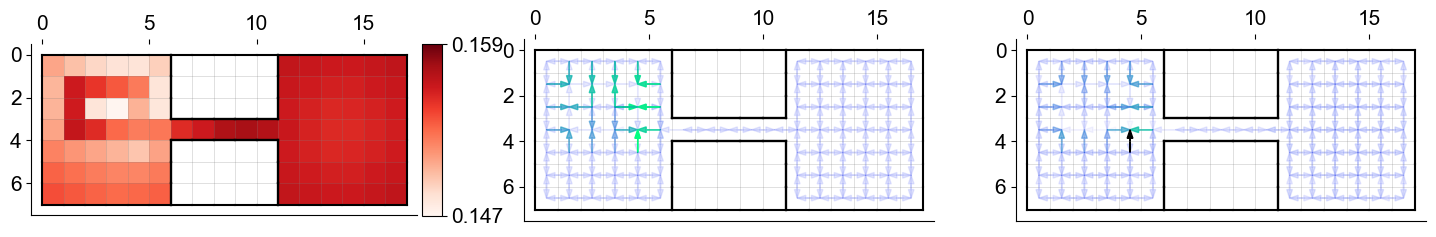

step 13:
	Replayed transition: [89  1 72]
	Backup dictionary:
        0-117: []
	Replay history:
		 [56  2 57]
		 [55  2 56]
		 [54  2 55]
		 [53  2 54]
		 [52  2 53]
		 [35  3 52]
		 [18  3 35]
		 [19  0 18]
		 [20  0 19]
		 [21  0 20]
		 [38  1 21]
		 [55  1 38]
		 [72  1 55]


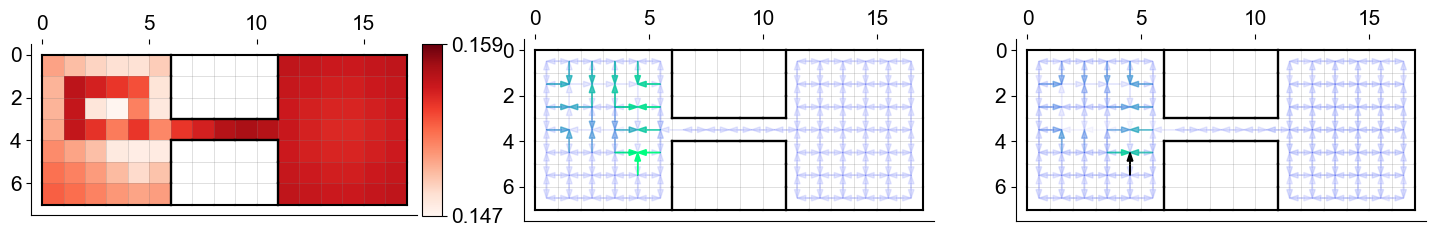

step 14:
	Replayed transition: [88  2 89]
	Backup dictionary:
        0-117: []
	Replay history:
		 [56  2 57]
		 [55  2 56]
		 [54  2 55]
		 [53  2 54]
		 [52  2 53]
		 [35  3 52]
		 [18  3 35]
		 [19  0 18]
		 [20  0 19]
		 [21  0 20]
		 [38  1 21]
		 [55  1 38]
		 [72  1 55]
		 [89  1 72]


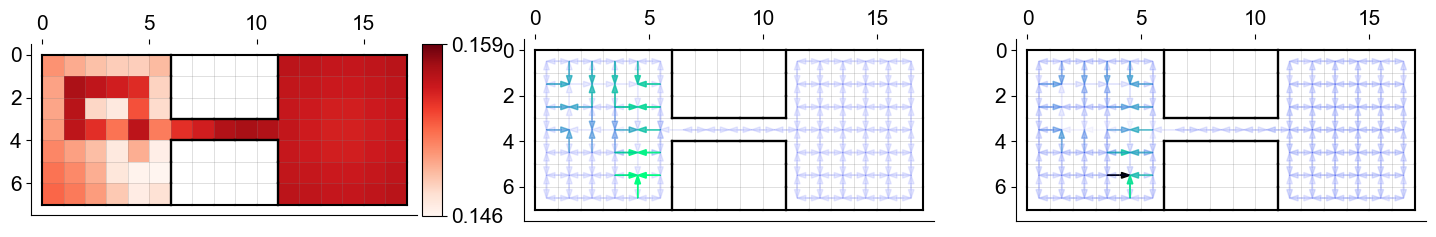

step 15:
	Replayed transition: [87  2 88]
	Backup dictionary:
        0-117: []
	Replay history:
		 [56  2 57]
		 [55  2 56]
		 [54  2 55]
		 [53  2 54]
		 [52  2 53]
		 [35  3 52]
		 [18  3 35]
		 [19  0 18]
		 [20  0 19]
		 [21  0 20]
		 [38  1 21]
		 [55  1 38]
		 [72  1 55]
		 [89  1 72]
		 [88  2 89]


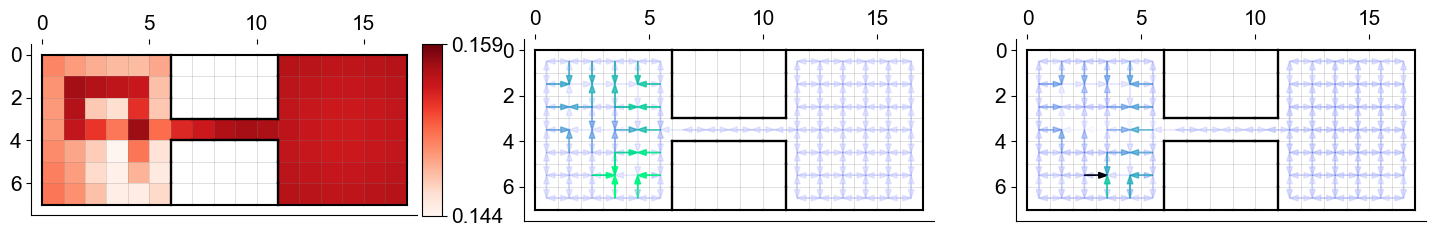

step 16:
	Replayed transition: [86  2 87]
	Backup dictionary:
        0-117: []
	Replay history:
		 [56  2 57]
		 [55  2 56]
		 [54  2 55]
		 [53  2 54]
		 [52  2 53]
		 [35  3 52]
		 [18  3 35]
		 [19  0 18]
		 [20  0 19]
		 [21  0 20]
		 [38  1 21]
		 [55  1 38]
		 [72  1 55]
		 [89  1 72]
		 [88  2 89]
		 [87  2 88]


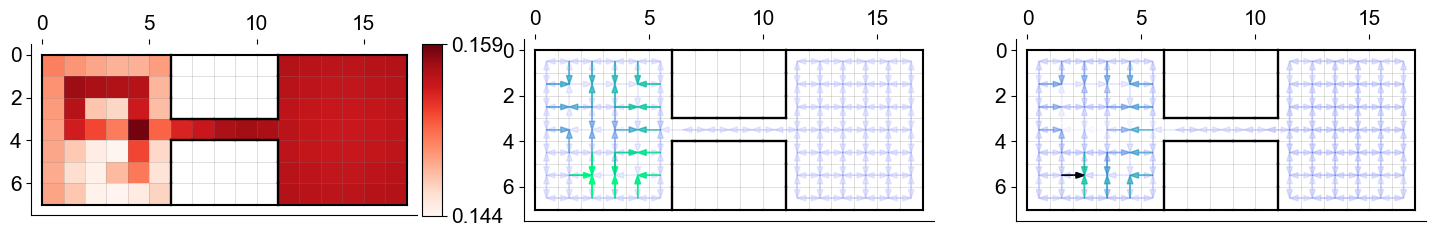

step 17:
	Replayed transition: [69  3 86]
	Backup dictionary:
        0-117: []
	Replay history:
		 [56  2 57]
		 [55  2 56]
		 [54  2 55]
		 [53  2 54]
		 [52  2 53]
		 [35  3 52]
		 [18  3 35]
		 [19  0 18]
		 [20  0 19]
		 [21  0 20]
		 [38  1 21]
		 [55  1 38]
		 [72  1 55]
		 [89  1 72]
		 [88  2 89]
		 [87  2 88]
		 [86  2 87]


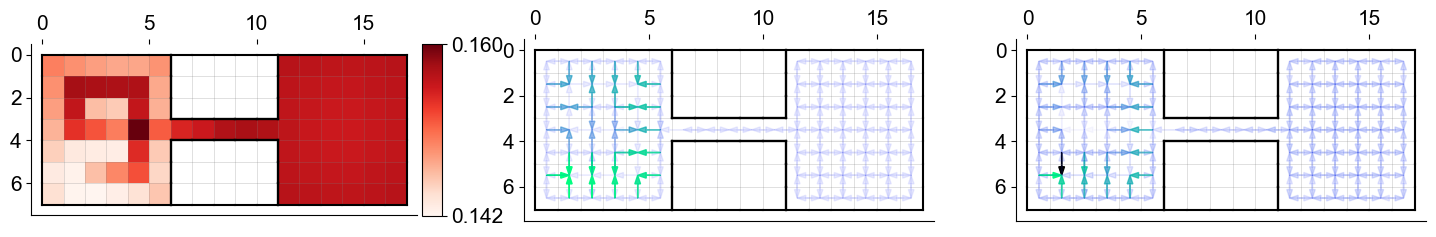

step 18:
	Replayed transition: [52  3 69]
	Backup dictionary:
        0-117: []
	Replay history:
		 [56  2 57]
		 [55  2 56]
		 [54  2 55]
		 [53  2 54]
		 [52  2 53]
		 [35  3 52]
		 [18  3 35]
		 [19  0 18]
		 [20  0 19]
		 [21  0 20]
		 [38  1 21]
		 [55  1 38]
		 [72  1 55]
		 [89  1 72]
		 [88  2 89]
		 [87  2 88]
		 [86  2 87]
		 [69  3 86]


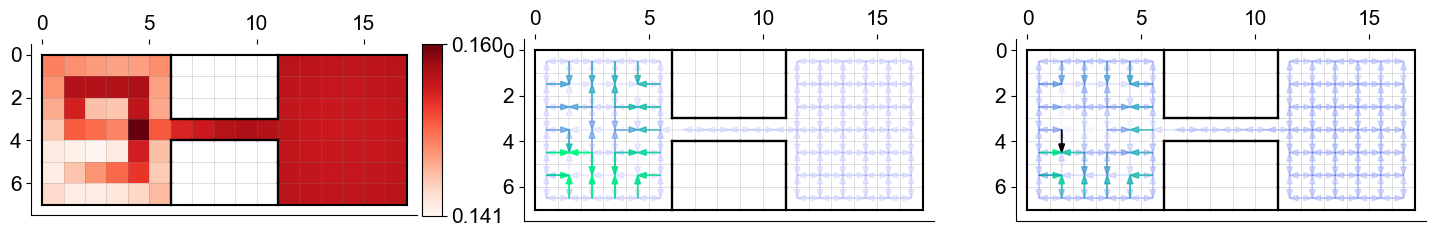

step 19:
	Replayed transition: [51  2 52]
	Backup dictionary:
        0-117: []
	Replay history:
		 [56  2 57]
		 [55  2 56]
		 [54  2 55]
		 [53  2 54]
		 [52  2 53]
		 [35  3 52]
		 [18  3 35]
		 [19  0 18]
		 [20  0 19]
		 [21  0 20]
		 [38  1 21]
		 [55  1 38]
		 [72  1 55]
		 [89  1 72]
		 [88  2 89]
		 [87  2 88]
		 [86  2 87]
		 [69  3 86]
		 [52  3 69]


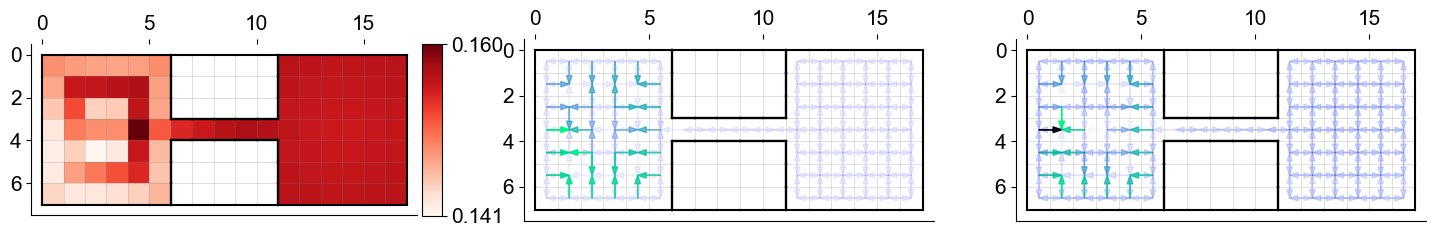

In [18]:
# Plot the replayed experiences
print('First %d replay steps' % num_replay_steps, flush=True)
fig, ax = plt.subplots(1, 1, figsize=(6,6))
plot_replay(bottleneck, np.array(replayed_exps).astype(int), ax=ax)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.axis('off')
# ax.scatter((0.5), (2.485), marker='x', color='r')
# plt.savefig('./figs/fig2/fig2_bottleneck_all.pdf', transparent=True)

#Plotting params
# params = {'min_need' : 0,
#           'max_need' : 1}

#Plot need, gain, MEVB throughout each of those steps
meta_need = np.mean(needs, axis=1)
meta_gain = np.mean(gains, axis=1)
meta_MEVB = np.mean(all_MEVBs, axis=1)
verbose = True

for i in range(min(num_replay_steps, 50)):
    print('step %d:' % i)
    if verbose:
        print('\tReplayed transition:', replayed_exps[i])
        print('\tBackup dictionary:')
        dict_print(backups[i], indent_size=8)
        print('\tReplay history:')
        for j in range(i):
            print('\t\t',replayed_exps[j]) # so dumb

    plot_need_gain(bottleneck, ga.memory, np.average(meta_need[i, :, :], weights=init_state_dist, axis=0), 
                   meta_gain[i, :], meta_MEVB[i, :], specials=[tuple(replayed_exps[i])])
    plt.show()

*Linear chamber*

In [13]:
## Linear chamber
# Physics
length = 10

# Build object
init_state_dist = np.zeros(length)
init_state_dist[0] = 1
tunnel = LinearChamber(length, init_state_distribution=init_state_dist)
all_experiences = tunnel.get_all_transitions()
T = tunnel.transitions

## Agent parameters
goal_states = np.array([length - 1]) # Non-start corners
goal_states = np.arange(length)
alpha = 1.0
gamma = 0.95
num_replay_steps = length - 1

# Set up agent
ga = GeodesicAgent(tunnel.num_states, tunnel.num_actions, goal_states, T, alpha=alpha, gamma=gamma,
                  s0_dist=init_state_dist)
ga.curr_state = 0
ga.remember(all_experiences) # Pre-load our agent with all possible memories

## Run replay
replayed_experiences, stats_for_nerds, backups = ga.replay(num_steps=num_replay_steps, verbose=True, prospective=True)
needs, trans_needs, gains, all_MEVBs = stats_for_nerds

First 9 replay steps


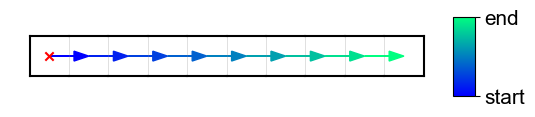

In [14]:
# Plot the replayed experiences
print('First %d replay steps' % num_replay_steps, flush=True)
fig, ax = plt.subplots(1, 1, figsize=(6,6))
plot_replay(tunnel, np.array(replayed_experiences).astype(int), ax=ax)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.axis('off')
ax.scatter((0.5), (0.5), marker='x', color='r')
plt.savefig('./figs/fig2/fig2_linear_all.pdf', transparent=True)

# Plotting params
params = {'min_need' : 0,
          'max_need' : 1}

# Plot need, gain, MEVB throughout each of those steps
# meta_need = np.mean(needs, axis=1)
# meta_gain = np.mean(gains, axis=1)
# meta_MEVB = np.mean(all_MEVBs, axis=1)
# verbose = True

# for i in range(num_replay_steps):
#     print('step %d:' % i)
#     if verbose:
#         print('\tReplayed transition:', replayed_experiences[i])
#         print('\tBackup dictionary:')
#         dict_print(backups[i], indent_size=8)
#         print('\tReplay history:')
#         for j in range(i):
#             print('\t\t',replayed_experiences[j]) # so dumb

#     plot_need_gain(tunnel, ga.memory, np.average(meta_need[i, :, :], weights=init_state_dist, axis=0), 
#                    meta_gain[i, :], meta_MEVB[i, :], specials=[tuple(replayed_experiences[i])], params=params)
#     plt.show()

*Community graph*

In [ ]:
## Community graph, a la Anna Schapiro

# Reproducibility
np.random.seed(865612)

# Store?
save = True

# Physics
num_nbrhds = 3
num_nbrs = 5
num_states = num_nbrhds * num_nbrs

# Build object
init_state_dist = np.ones(num_states) / num_states
cg = CommunityGraph(num_nbrhds, num_nbrs, init_state_dist)
all_experiences = cg.get_all_transitions()
T = cg.transitions

## Agent parameters
goal_states = np.arange(num_states)
alpha = 0.3
gamma = 0.95
num_replay_steps = 200

# Set up agent
ga = GeodesicAgent(cg.num_states, cg.num_actions, goal_states, T, alpha=alpha, gamma=gamma,
                  s0_dist=init_state_dist)
ga.curr_state = 0
ga.remember(all_experiences) # Pre-load our agent with all possible memories

## Run replay
check_convergence = False
conv_thresh = 1e-8
replayed_exps, stats_for_nerds, backups = ga.replay(num_steps=num_replay_steps, verbose=True, prospective=True,
                                                    check_convergence=check_convergence, convergence_thresh=conv_thresh)
needs, trans_needs, gains, all_MEVBs = stats_for_nerds

# Save
if save:
    np.savez('Data/cg_3hd_5rs_lr030.npz', replay_seqs=replayed_exps, needs=needs, gains=gains, all_MEVBs=all_MEVBs, backups=backups,
                                    num_nbrhds=num_nbrhds, num_nbrs=num_nbrs, num_states=num_states,
                                    alpha=alpha, gamma=gamma, num_replay_steps=num_replay_steps)

In [ ]:
print(replayed_exps[:20])

In [ ]:
print(replayed_exps.shape)
for i in range(5):
    for j in range(5):
        print('start: %d, end: %d, GR: %.2f' % (i, j, ga.G[i, 0, j]))
plt.figure(figsize=(14, 14))
plt.imshow(ga.G[:, 0, :])
plt.colorbar()

In [ ]:
for s in range(num_states):
    print()
    for g in range(num_states):
        print(s, g, np.max(ga.G[s, :, g]))

### Learning curves

In [2]:
d = np.load('./Data/learning_curves/learning_curves.npz')

In [3]:
for key in d.keys():
    print(key)

pri_times
uni_times


In [4]:
pri_times = d['pri_times']
uni_times = d['uni_times']

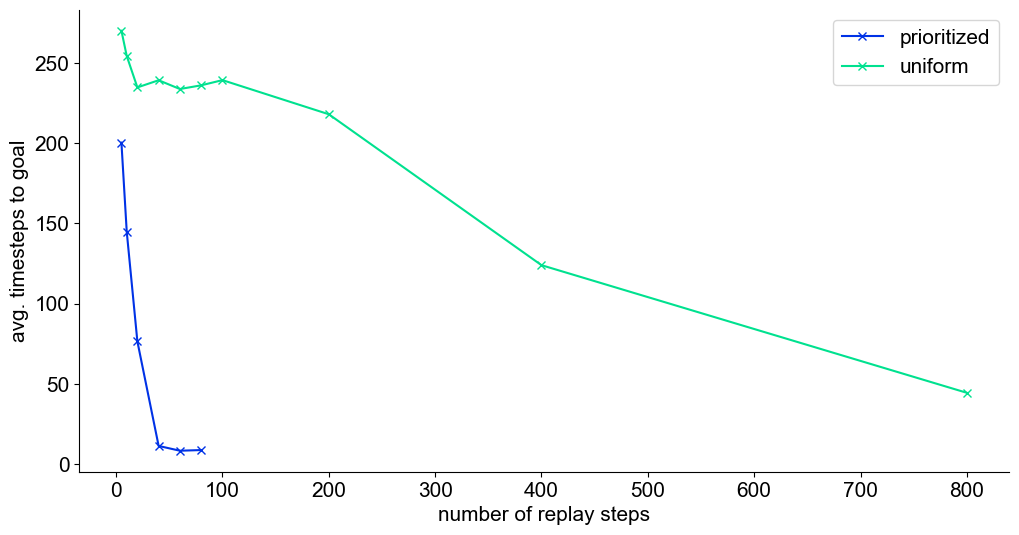

In [7]:
pri_replay_steps = [5, 10, 20, 40, 60, 80]
uni_replay_steps = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
plt.figure(figsize=(12,6))
plt.plot(pri_replay_steps, np.nanmean(pri_times, axis=0), marker='x',label='prioritized', color=plt.get_cmap('winter')(50))
plt.plot(uni_replay_steps, np.nanmean(uni_times, axis=0), marker='x',label='uniform', color=plt.get_cmap('winter')(225))
plt.xlabel('number of replay steps')
plt.ylabel('avg. timesteps to goal')
plt.legend()

plt.savefig('./figs/fig1learning_curves.pdf', transparent=True)


In [ ]:
plt.get_cmap('winter')(1)